<h1>Importing the libraries necessary for this project</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from tabulate import tabulate


<h3>Loading the dataset</h3>
<ul>
    <li>Definining the dataset as dataframe</li>
    <li>Displaying few rows of the dataframe to verify is loads correctly</li>
</ul>

In [2]:
file_path = "C:/Users/Erick/Downloads/State_of_Iowa_Consumer_Fraud_Refund_Transactions.csv"
df = pd.read_csv(file_path)
df.head()

C:\Users\Erick\AppData\Local\Temp\ipykernel_18672\1335000191.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Record Number,Fiscal Year,Fiscal Year Period,Accounting Period,Service,Department,Fund Code,Fund Name,Appropriation Code,Appropriation Name,...,Vendor,Vendor Number,Payment Number,Payment Issue Date,Invoice Number,Invoice Line Number,Invoice Line Distribution Number,Invoice Date,Amount,Description
0,206447566,2015,4,OCTOBER,JUSTICE SYSTEM,ATTORNEY GENERAL,822,CONSUMER FRAUD REFUNDS,NaN,NaN,...,DAVID BOWEN,11200,GAX-112-300554-1-0,10/27/2014,GAX-112-300554-1-0,1,1,10/27/2014,106.0,REFUND
1,201984968,2015,3,SEPTEMBER,JUSTICE SYSTEM,ATTORNEY GENERAL,822,CONSUMER FRAUD REFUNDS,NaN,NaN,...,MICHAEL SHIFLEPP,11200,GAX-112-031814-1-0,09/04/2014,GAX-112-031814-1-0,1,1,09/04/2014,87.0,REFUND
2,205565406,2015,4,OCTOBER,JUSTICE SYSTEM,ATTORNEY GENERAL,822,CONSUMER FRAUD REFUNDS,NaN,NaN,...,MOHAMMAD FAROOQ,11200,GAX-112-213731-1-0,10/16/2014,GAX-112-213731-1-0,1,1,10/16/2014,138.0,REFUND
3,205725710,2015,4,OCTOBER,JUSTICE SYSTEM,ATTORNEY GENERAL,822,CONSUMER FRAUD REFUNDS,NaN,NaN,...,DEBORAH KOZIOL,11200,GAX-112-227158-1-0,10/17/2014,GAX-112-227158-1-0,1,1,10/17/2014,27.0,REFUND
4,202361828,2015,3,SEPTEMBER,JUSTICE SYSTEM,ATTORNEY GENERAL,822,CONSUMER FRAUD REFUNDS,NaN,NaN,...,REGINA M WHITE,11200,GAX-112-075671-1-0,09/08/2014,GAX-112-075671-1-0,1,1,09/08/2014,17.0,REFUND


<h1>Exploratory Data Analysis</h1>

<h3>Dropping any non value on the data set, removing duplicates or any missing value</h3>

In [3]:
# Step 1: Drop completely null columns
df_cleaned = df.drop(columns=["Appropriation Code", "Appropriation Name","Fund Name","Invoice Line Number","Invoice Line Distribution Number"])

# Step 2: Convert date columns to datetime
df_cleaned["Payment Issue Date"] = pd.to_datetime(df_cleaned["Payment Issue Date"], errors='coerce')
df_cleaned["Invoice Date"] = pd.to_datetime(df_cleaned["Invoice Date"], errors='coerce')

# Step 3: Convert 'Vendor Number' to a consistent string type
df_cleaned["Vendor Number"] = df_cleaned["Vendor Number"].astype(str)

# Step 4: Check for and remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Step 5: Basic summary statistics and missing value check
summary_stats = df_cleaned["Amount"].describe()
missing_values = df_cleaned.isnull().sum()


<h3>Checking the data set after the cleaning</h3>

In [4]:
df_cleaned.head()

,Record Number,Fiscal Year,Fiscal Year Period,Accounting Period,Service,Department,Fund Code,Program,Expense Category,Vendor,Vendor Number,Payment Number,Payment Issue Date,Invoice Number,Invoice Date,Amount,Description
0,206447566,2015,4,OCTOBER,JUSTICE SYSTEM,ATTORNEY GENERAL,822,CONSUMER FRAUD REFUNDS,REFUNDS-OTHER,DAVID BOWEN,11200,GAX-112-300554-1-0,2014-10-27,GAX-112-300554-1-0,2014-10-27,106.0,REFUND
1,201984968,2015,3,SEPTEMBER,JUSTICE SYSTEM,ATTORNEY GENERAL,822,CONSUMER FRAUD REFUNDS,REFUNDS-OTHER,MICHAEL SHIFLEPP,11200,GAX-112-031814-1-0,2014-09-04,GAX-112-031814-1-0,2014-09-04,87.0,REFUND
2,205565406,2015,4,OCTOBER,JUSTICE SYSTEM,ATTORNEY GENERAL,822,CONSUMER FRAUD REFUNDS,REFUNDS-OTHER,MOHAMMAD FAROOQ,11200,GAX-112-213731-1-0,2014-10-16,GAX-112-213731-1-0,2014-10-16,138.0,REFUND
3,205725710,2015,4,OCTOBER,JUSTICE SYSTEM,ATTORNEY GENERAL,822,CONSUMER FRAUD REFUNDS,REFUNDS-OTHER,DEBORAH KOZIOL,11200,GAX-112-227158-1-0,2014-10-17,GAX-112-227158-1-0,2014-10-17,27.0,REFUND
4,202361828,2015,3,SEPTEMBER,JUSTICE SYSTEM,ATTORNEY GENERAL,822,CONSUMER FRAUD REFUNDS,REFUNDS-OTHER,REGINA M WHITE,11200,GAX-112-075671-1-0,2014-09-08,GAX-112-075671-1-0,2014-09-08,17.0,REFUND


<h3>Plotting few graphs for visualization, and better understand of the data</h3>

C:\Users\Erick\AppData\Local\Temp\ipykernel_18672\3423554045.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vendors.values, y=top_vendors.index, palette="viridis")


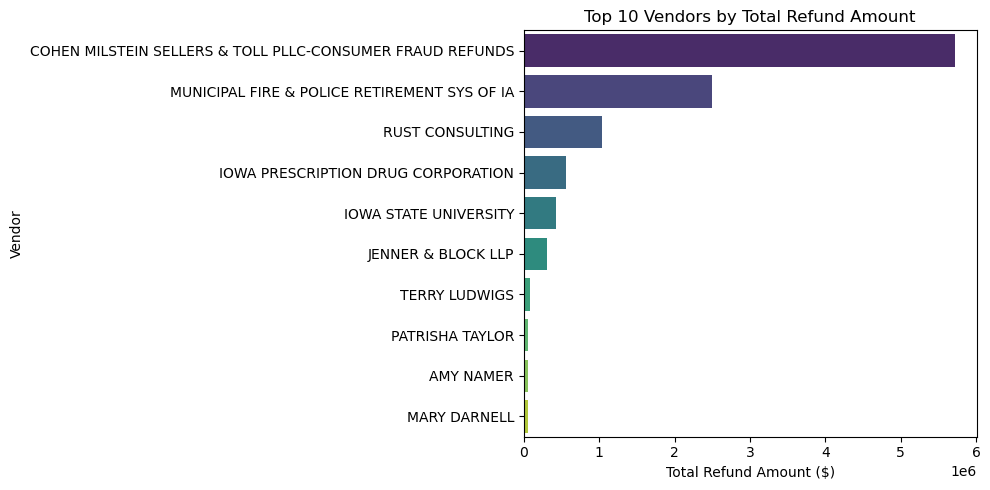

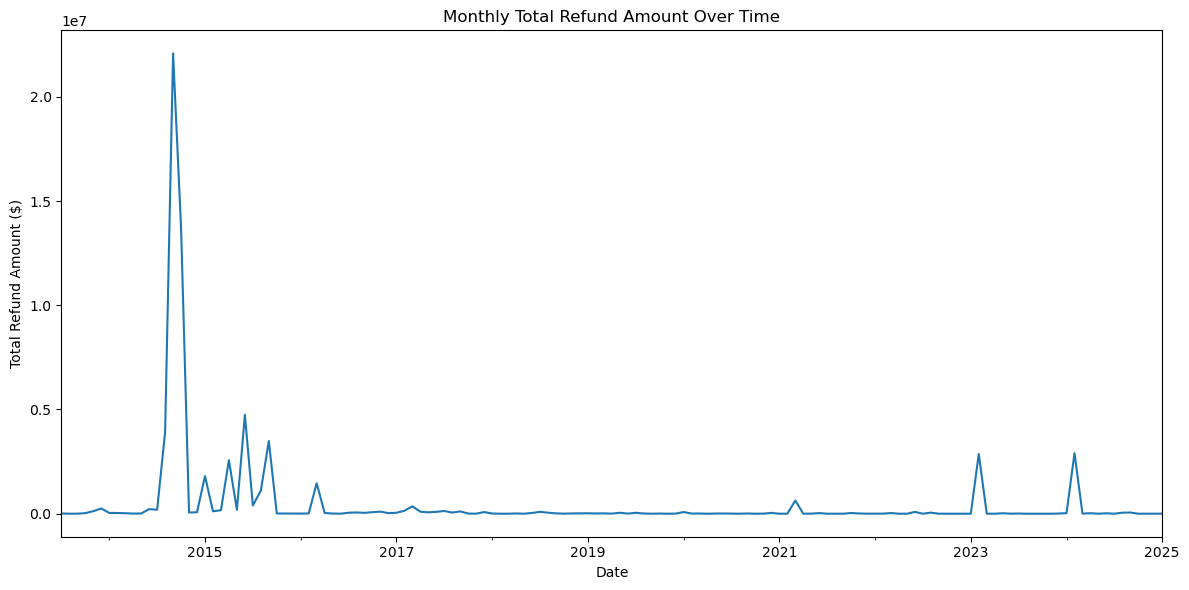

In [5]:
# Plot 1: Top 10 Vendors by Total Refund Amount
top_vendors = df_cleaned.groupby("Vendor")["Amount"].sum().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_vendors.values, y=top_vendors.index, palette="viridis")
plt.title("Top 10 Vendors by Total Refund Amount")
plt.xlabel("Total Refund Amount ($)")
plt.ylabel("Vendor")
plt.tight_layout()
plt.show()

# Plot 2: Monthly refund trends over time
monthly_trend = df_cleaned.resample('ME', on="Payment Issue Date")["Amount"].sum()
plt.figure(figsize=(12, 6))
monthly_trend.plot()
plt.title("Monthly Total Refund Amount Over Time")
plt.xlabel("Date")
plt.ylabel("Total Refund Amount ($)")
plt.tight_layout()
plt.show()



<h3>Ensuring the refund class is created, splitting the class in two to help differentiate low and high amount </h3>

<p> Applying a function to distinguish between low and high refunds, setting the rows that will be considered as parameters to train our model which have a function of predict the fraud on this case all those refunds went to court and they were accepted by the judge as fraudulent case</p>

In [6]:
# Ensure Refund_Class is correctly created
df_cleaned['Refund_Class'] = df_cleaned['Amount'].apply(lambda x: 'High' if x > 1000 else 'Low')

# Now, set the target and features
features = ["Fiscal Year", "Department", "Vendor", "Amount"]
target = "Refund_Class"

# Subset the data
X = df_cleaned[features]
y = df_cleaned[target]

In [7]:
# Step 1: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Reset indexes to avoid index-based mismatches during concatenation
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# Concatenate y to preserve labels
train_combined = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
test_combined = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)

In [8]:
# Step 3: Remove duplicate rows that appear in both train and test sets
deduped_train = train_combined.merge(test_combined.drop_duplicates(), how='left', indicator=True)
deduped_train = deduped_train[deduped_train['_merge'] == 'left_only'].drop(columns=['_merge'])

# Separate features and target again
X_train_cleaned = deduped_train[features]
y_train_cleaned = deduped_train[target]


In [9]:
# Step 4: Handle datetime columns separately (if any)
datetime_columns = X_train_cleaned.select_dtypes(include=['datetime64']).columns

# Convert datetime columns to numerical features (e.g., number of days since a reference date)
for col in datetime_columns:
    X_train_cleaned[col] = (X_train_cleaned[col] - X_train_cleaned[col].min()).dt.days
    X_test[col] = (X_test[col] - X_test[col].min()).dt.days

# Step 5: Preprocessing for numeric and categorical columns
categorical_features = X_train_cleaned.select_dtypes(include=['object']).columns.tolist()


In [10]:
# Step 6: Create a transformer to handle the categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Leave non-categorical columns as is
)

# Create a pipeline that first transforms the data and then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, class_weight="balanced"))
])


In [11]:
# Step 8: Train the Decision Tree using the pipeline
pipeline.fit(X_train_cleaned, y_train_cleaned)

# Step 9: Evaluate the model on the cleaned test set
y_pred = pipeline.predict(X_test)

# Step 10: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

# Step 11: Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      1074
         Low       1.00      1.00      1.00     85791

    accuracy                           1.00     86865
   macro avg       1.00      1.00      1.00     86865
weighted avg       1.00      1.00      1.00     86865



In [12]:
# Check if there are duplicates between train and test set
duplicates = X_train[X_train.isin(X_test)].dropna()
print(f"Number of duplicated rows between train and test sets: {duplicates.shape[0]}")


Number of duplicated rows between train and test sets: 0


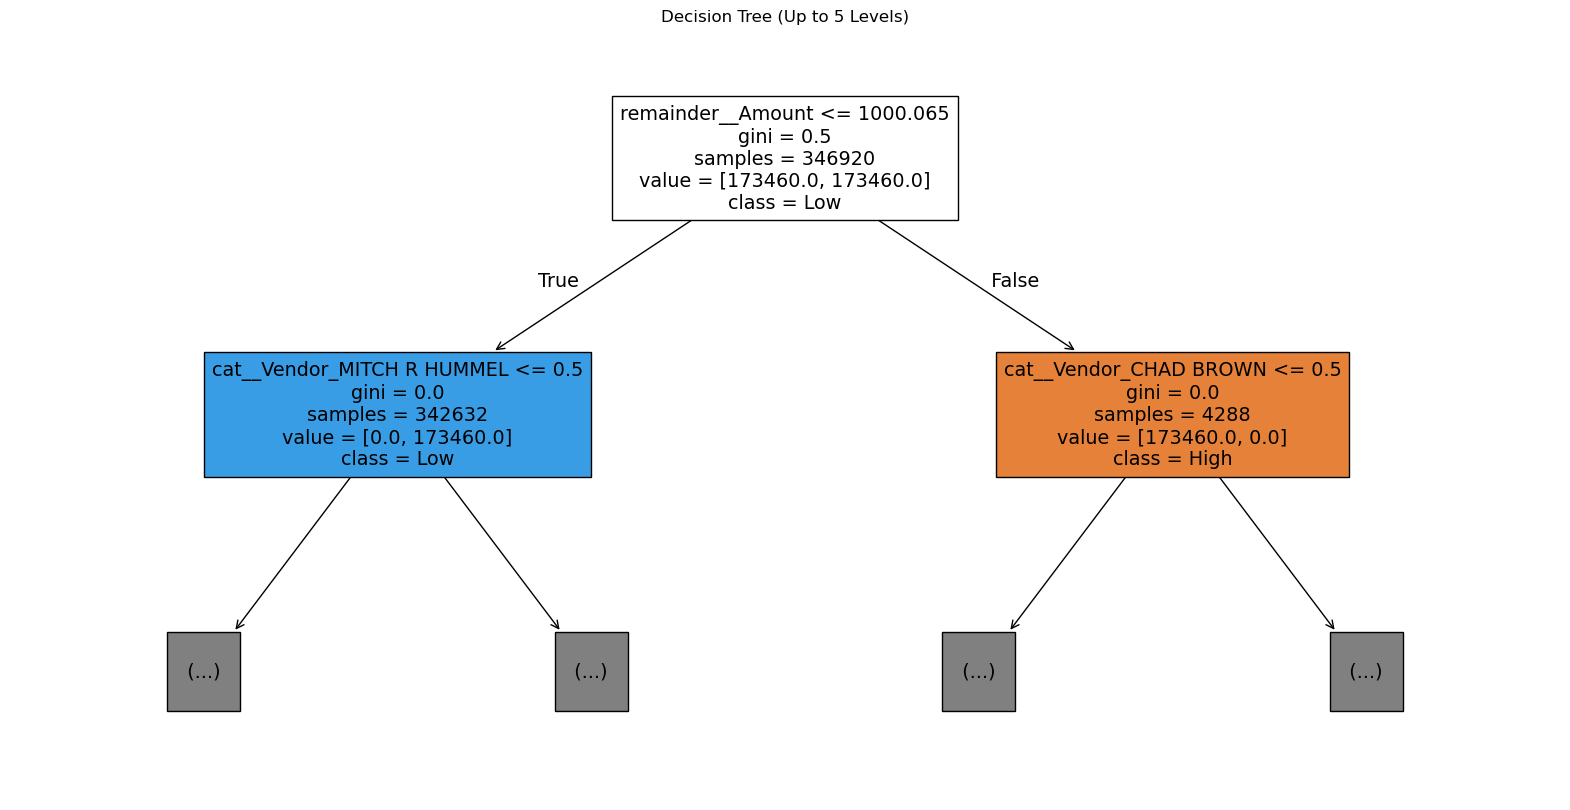

In [13]:
# Extract components for visualization
classifier = pipeline.named_steps['classifier']
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(classifier, feature_names=feature_names, class_names=['High', 'Low'], filled=True, max_depth=1)
plt.title("Decision Tree (Up to 5 Levels)")
plt.show()


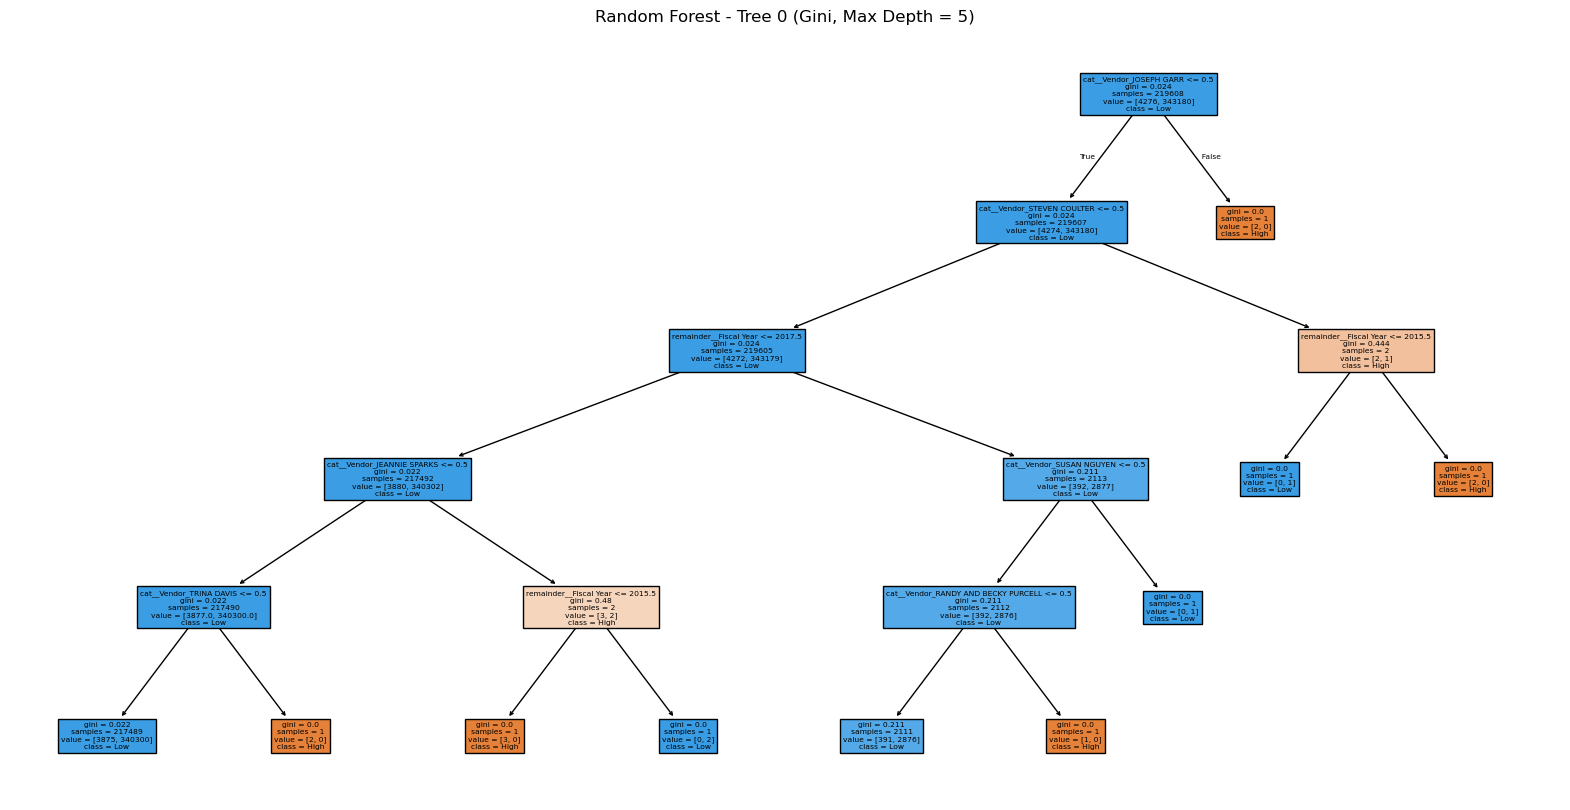

In [14]:
# Step 1: Create the preprocessor (same as before)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Step 2: Create a Random Forest with Gini
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',         # Use Gini impurity
    max_depth=5,              # Limit tree depth
    random_state=42
)

# Step 3: Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)
])

# Step 4: Fit the pipeline
pipeline.fit(X_train, y_train)

# Step 5: Plot one tree from the forest
# (e.g., the first tree in the ensemble)
estimator = rf_classifier.estimators_[0]

# Get feature names after preprocessing
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Step 6: Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(estimator, feature_names=feature_names, class_names=['High', 'Low'], filled=True, max_depth=5)
plt.title("Random Forest - Tree 0 (Gini, Max Depth = 5)")
plt.show()


In [15]:

# Define categorical features
categorical_features = ['Department', 'Vendor']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Define Random Forest classifier with class weight balancing
model = RandomForestClassifier(class_weight='balanced', random_state=42)



In [16]:
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Fit the pipeline
pipeline.fit(X_train_cleaned, y_train_cleaned)

# Predict
y_pred = pipeline.predict(X_test)



Confusion Matrix:
 [[ 1074     0]
 [    0 85791]]

TP: 1074, FP: 0, TN: 85791, FN: 0

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      1074
         Low       1.00      1.00      1.00     85791

    accuracy                           1.00     86865
   macro avg       1.00      1.00      1.00     86865
weighted avg       1.00      1.00      1.00     86865



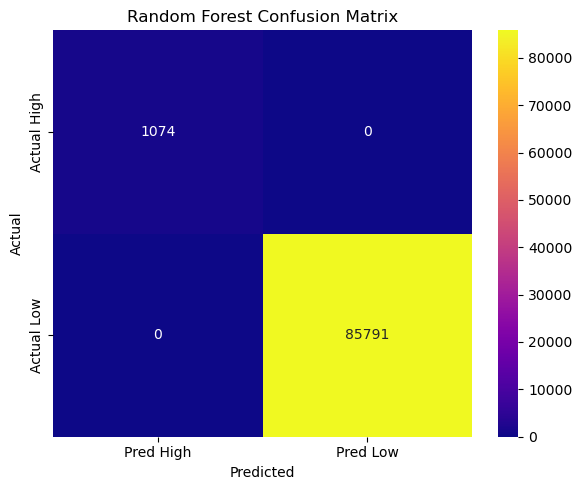

In [17]:
# Evaluate
cm = confusion_matrix(y_test, y_pred, labels=['High', 'Low'])  # Adjust labels as needed

TP = cm[0, 0]
FN = cm[0, 1]
FP = cm[1, 0]
TN = cm[1, 1]

print("Confusion Matrix:\n", cm)
print(f"\nTP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['High', 'Low']))

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma',
            xticklabels=['Pred High', 'Pred Low'],
            yticklabels=['Actual High', 'Actual Low'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [18]:
# Step 8: Train the Decision Tree using the pipeline
pipeline.fit(X_train_cleaned, y_train_cleaned)

# Evaluate on Training Set
y_train_pred = pipeline.predict(X_train_cleaned)
train_accuracy = accuracy_score(y_train_cleaned, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")
print("Training Classification Report:")
print(classification_report(y_train_cleaned, y_train_pred))

# Evaluate on Test Set
y_test_pred = pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy:.2f}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 1.00
Training Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      4288
         Low       1.00      1.00      1.00    342632

    accuracy                           1.00    346920
   macro avg       1.00      1.00      1.00    346920
weighted avg       1.00      1.00      1.00    346920


Test Accuracy: 1.00
Test Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      1074
         Low       1.00      1.00      1.00     85791

    accuracy                           1.00     86865
   macro avg       1.00      1.00      1.00     86865
weighted avg       1.00      1.00      1.00     86865



In [26]:


# Encode target
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['float64', 'int64']).columns.tolist()),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=len(y_train_encoded[y_train_encoded == 0]) / len(y_train_encoded[y_train_encoded == 1]),
                              use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(class_weight='balanced', probability=True),
    "Dummy (Most Frequent)": DummyClassifier(strategy='most_frequent')
}

# Collect results
results = []

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train_encoded)
    y_pred = pipeline.predict(X_test)
    
    acc = accuracy_score(y_test_encoded, y_pred)
    report = classification_report(y_test_encoded, y_pred, output_dict=True, zero_division=0)
    
    results.append([
        name,
        f"{acc:.4f}",
        f"{report['0']['precision']:.4f}",
        f"{report['0']['recall']:.4f}",
        f"{report['0']['f1-score']:.4f}",
        f"{report['1']['precision']:.4f}",
        f"{report['1']['recall']:.4f}",
        f"{report['1']['f1-score']:.4f}",
        f"{report['accuracy']:.4f}"
    ])

# Headers for the table
headers = ["Model", "Accuracy",
           "Precision (0)", "Recall (0)", "F1 (0)",
           "Precision (1)", "Recall (1)", "F1 (1)",
           "Overall Accuracy"]

# Print results table
print(tabulate(results, headers=headers, tablefmt="grid"))


C:\Users\Erick\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:43:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


+-----------------------+------------+-----------------+--------------+----------+-----------------+--------------+----------+--------------------+
| Model                 |   Accuracy |   Precision (0) |   Recall (0) |   F1 (0) |   Precision (1) |   Recall (1) |   F1 (1) |   Overall Accuracy |
+=======================+============+=================+==============+==========+=================+==============+==========+====================+
| Logistic Regression   |     0.9919 |          0.6051 |       1      |   0.7539 |          1      |       0.9918 |   0.9959 |             0.9919 |
+-----------------------+------------+-----------------+--------------+----------+-----------------+--------------+----------+--------------------+
| Random Forest         |     1      |          1      |       1      |   1      |          1      |       1      |   1      |             1      |
+-----------------------+------------+-----------------+--------------+----------+-----------------+------------